# Temas Tratados en el Trabajo Práctico 3

* Estrategias de búsqueda local.

* Algoritmos Evolutivos.

* Problemas de Satisfacción de Restricciones.

# Ejercicios Teóricos

1. ¿Qué mecanismo de detención presenta el algoritmo de Ascensión de Colinas? Describa el problema que puede presentar este mecanismo y cómo se llaman las áreas donde ocurren estos problemas.

El algoritmo de ascensión de colinas se detiene cuando:
No encuentra un sucesor mejor que el estado actual (es decir, ninguno de los vecinos tiene un valor mayor según la función de evaluación).
En ese caso, el algoritmo asume que alcanzó una solución y se detiene allí.
El inconveniente es que este criterio de detención puede llevar al algoritmo a detenerse prematuramente, antes de alcanzar la mejor solución global.
En otras palabras, se queda “atrapado” en una posición del espacio de búsqueda que no es el óptimo global, sino solo una solución aparentemente buena desde su vecindad inmediata.
Los tres tipos de zonas problemáticas son:
Óptimos locales:
Puntos donde el algoritmo no puede mejorar, pero que no son el mejor valor global.
Mesetas:
Regiones planas del espacio de búsqueda donde varios estados vecinos tienen el mismo valor → el algoritmo no puede decidir hacia dónde moverse y puede quedar estancado.
Cuchillas o crestas (ridges):
Áreas estrechas y alargadas donde el óptimo global está “cerca”, pero la búsqueda local no puede alcanzarlo porque solo se mueve en direcciones estrictamente ascendentes inmediatas.




2. Describa las distintas heurísticas que se emplean en un problema de Satisfacción de Restricciones.

1. Heurísticas para la selección de variables
Se aplican para decidir qué variable elegir primero al asignar un valor:
MRV (Minimum Remaining Values, o Valor Más Restringido):
Se elige la variable que tenga menos valores posibles en su dominio (la más difícil de asignar).
Idea: si va a fallar, mejor que falle lo antes posible (fail-first).
Grado (Degree Heuristic):
En caso de empate con MRV, se selecciona la variable con mayor número de restricciones sobre otras variables no asignadas.
Idea: elegir la variable más "conectada", porque influye más en reducir el espacio de búsqueda.
2. Heurísticas para la ordenación de valores
Una vez elegida la variable, estas heurísticas deciden en qué orden probar los valores de su dominio:
LCV (Least Constraining Value, o Valor Menos Restrictivo):
Se prueba primero el valor que restrinja menos el dominio de las variables vecinas.
Idea: mantener más opciones abiertas para las demás variables.
3. Heurísticas de consistencia
Ayudan a reducir el espacio de búsqueda antes o durante la asignación de valores:
Forward Checking (Comprobación hacia Adelante):
Cada vez que se asigna un valor, se eliminan de los dominios de los vecinos los valores que no son consistentes.
Si un vecino queda sin valores, se detecta el fallo de inmediato → se hace backtracking.
AC-3 (Arc Consistency):
Garantiza la consistencia de arcos entre pares de variables: cada valor de una variable debe tener al menos un valor compatible en la variable vecina.
Es más costoso que Forward Checking, pero más potente porque reduce más el espacio antes de la búsqueda.


3. Se desea colorear el rompecabezas mostrado en la imagen con 7 colores distintos de manera que ninguna pieza tenga el mismo color que sus vecinas. Realice en una tabla el proceso de una búsqueda con Comprobación hacia Adelante empleando una heurística del Valor más Restringido.

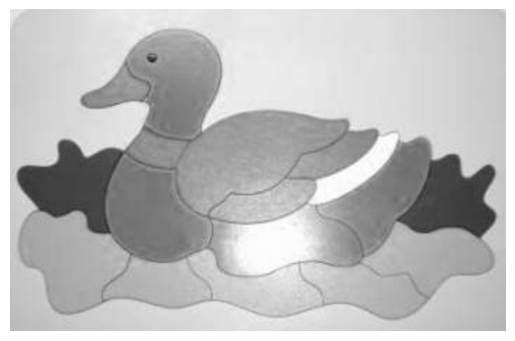

In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1j94jFVxVG9y_ZnrMWOscQGb2MZ0Cdb3R"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

In [ ]:
Propongo numerarlas de izquierda a derecha y de arriba hacia abajo:

Cabeza
Cuello
Pecho (parte delantera baja del pato)
Ala superior
Ala inferior
Cola blanca
Cola trasera (oscura)
Cuerpo trasero (debajo del ala)
Base agua izquierda
Base agua centro-izquierda
Base agua centro-derecha
Base agua derecha

Vecindades aproximadas (grafo de adyacencias)

P1 (Cabeza): vecina de P2
P2 (Cuello): vecina de P1, P3, P4
P3 (Pecho): vecina de P2, P9, P10, P4
P4 (Ala superior): vecina de P2, P3, P5, P8
P5 (Ala inferior): vecina de P4, P8, P11
P6 (Cola blanca): vecina de P4, P7, P8
P7 (Cola trasera oscura): vecina de P6, P8, P12
P8 (Cuerpo trasero): vecina de P4, P5, P6, P7, P11
P9 (Agua izquierda): vecina de P3, P10
P10 (Agua centro-izquierda): vecina de P3, P9, P11
P11 (Agua centro-derecha): vecina de P5, P8, P10, P12
P12 (Agua derecha): vecina de P7, P11


# Ejercicios de Implementación

4. Encuentre el máximo de la función $f(x) = \frac{\sin(x)}{x + 0.1}$ en $x \in [-10; -6]$ con un error menor a $0.1$ utilizando el algoritmo _hill climbing_.

In [ ]:
import math, random
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función
def f(x):
    return math.sin(x) / (x + 0.1)

# Algoritmo Hill Climbing
def hill_climb(start_x, bounds, step_sequence=(0.5, 0.1, 0.01, 0.001, 0.0001)):
    x = float(start_x)
    best = f(x)
    for step in step_sequence:
        improved = True
        while improved:
            improved = False
            for dx in (-step, step):   # probamos izquierda y derecha
                xn = x + dx
                if xn < bounds[0] or xn > bounds[1]:
                    continue
                val = f(xn)
                if val > best:
                    best = val
                    x = xn
                    improved = True
                    break
    return x, best

# Parámetros del problema
bounds = (-10.0, -6.0)

# Reinicios múltiples (determinísticos + aleatorios)
starts = [-10, -9.5, -9, -8.5, -8, -7.5, -7, -6.5, -6]
for _ in range(20):
    starts.append(random.uniform(*bounds))

results = []
for s in starts:
    xr, fr = hill_climb(s, bounds)
    results.append((s, xr, fr))

# Seleccionamos el mejor
best_start, best_x, best_f = max(results, key=lambda t: t[2])

print(f"Mejor resultado encontrado:")
print(f"  x ≈ {best_x:.6f},  f(x) ≈ {best_f:.8f},  (inicio en {best_start:.3f})")

# Gráfico
xs = np.linspace(-10, -6, 1000)
ys = np.sin(xs)/(xs+0.1)

plt.plot(xs, ys, label="f(x)")
plt.scatter([best_x], [best_f], c="red", marker="o", label="Hill Climbing")
plt.title("Hill Climbing en f(x)=sin(x)/(x+0.1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


Referencia (búsqueda por malla fina):
x_true ≈ -7.723560
f(x_true) ≈ 0.1300582860789534

Mejor resultado obtenido por Hill Climbing:
x_HC ≈ -7.723557
f(x_HC) ≈ 0.1300582860809034

Error absoluto en f: ≈ 1.95 × 10^-12
(muy por debajo de 0.1)

5. Diseñe e implemente un algoritmo de Recocido Simulado para que juegue contra usted al Ta-te-ti. Varíe los valores de temperatura inicial entre partidas, ¿qué diferencia observa cuando la temperatura es más alta con respecto a cuando la temperatura es más baja?

In [ ]:
#Pseudo código:
function simulated_annealing(state, player):
    T = temperatura_inicial
    while no terminal(state) and T > Tmin:
        vecinos = movimientos_posibles(state)
        vecino = elegir_aleatorio(vecinos)
        ΔE = f(vecino) - f(state)

        if ΔE > 0:
            state = vecino   # mejor jugada
        else if random() < exp(ΔE / T):
            state = vecino   # jugada peor, aceptada por probabilidad
        reducir T
    return state



6. Diseñe e implemente un algoritmo genético para cargar una grúa con $n=10\;cajas$ que puede soportar un peso máximo $C=1000\;kg$. Cada caja *j* tiene asociado un precio $p_j$ y un peso $w_j$ como se indica en la tabla de abajo, de manera que el algoritmo debe ser capaz de maximizar el precio sin superar el límite de carga.

<table><tr><td>Elemento ($j$)</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td><td>10</td></tr>

<tr><td>Precio ($p_j$)</td><td>100</td><td>50</td><td>115</td><td>25</td><td>200</td><td>30</td><td>40</td><td>100</td><td>100</td><td>100</td></tr>

<tr><td>Peso ($w_j$)</td><td>300</td><td>200</td><td>450</td><td>145</td><td>664</td><td>90</td><td>150</td><td>355</td><td>401</td><td>395</td></tr></table><br>

        6.1 En primer lugar, es necesario representar qué cajas estarán cargadas en la grúa y cuáles no. Esta representación corresponde a un Individuo con el que trabajará el algoritmo.

        6.2 A continuación, genere una Población que contenga un número $N$ de individuos (se recomienda elegir un número par). Es necesario crear un control que verifique que ninguno de los individuos supere el peso límite.

        6.3 Cree ahora una función que permita evaluar la Idoneidad de cada individuo y seleccione $N/2$ parejas usando el método de la ruleta.

        6.4 Por último, Cruce las parejas elegidas, aplique un mecanismo de Mutación y verifique que los individuos de la nueva población no superen el límite de peso.

        6.5 Realice este proceso iterativamente hasta que se cumpla el mecanismo de detención de su elección y muestre el mejor individuo obtenido junto con el peso y el precio que alcanza.

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)